#  COVID-19 outbreak in an enclosed environment

This notebook is available under the `Applications` directory of the [GitHub repository](https://github.com/ictr/covid19-outbreak-simulator) of the COVID19 Outbreak Simulator. It can be executed with [`sos-papermill`](https://github.com/vatlab/sos-papermill) with the following parameters, or using a docker image `bcmictr/outbreak-simulator-notebook` as described in [here](/covid19-outbreak-simulator/docs/cli/).

In [1]:
# proportion of social distancing
distancing = 0.4

## Background information and questions asked

An FPSO (Floating production storage and offloading) vessel is a floating production system that is perfectly "enclosed" but needs regular exchange of staffs. It has strict operation schedules and regulations, and has to stop production if it becomes understaffed due to an outbreak of COVID-19.

Assuming that

1. The FPSO has 64 staff, with one carrier of the SARS-CoV-2 virus.
2. The carrier was recently introduced and did not show any symptom upon arrival.
3. Anyone who shows symptom will be removed from the FPSO.

Questions:

1. What are the probabilities that the carrier will show symptom on the 1st, 2nd, ... day after arrival?
2. What are the probabilities that anyone will show symptom on the 1st, 2nd, ... day after the arrival of the carrier?
3. How likely that the outbreak will stop after the removal of the first symptomatic cases?
3. What are the probabilities that there will be a second symptomatic cases on the 1st, 2nd, ... day after the removal of the first symptomatic cases?

Operational wise:

1. How will 7-day quarantine before the introduction of the carrier affect the results?
2. How will 14-day quarantine before the introduction of the carrier affect the results?
3. Is it good enough to remove symptomatic cases?

## Simulation of COVID-19 outbreaks on FPSO vessel

This scenario can be simulated with the following command:

```
outbreak_simulator --popsize 64  --infectors 0 --leadtime asymptomatic --repeats 10000 --handle-symptomatic remove
```
where

* `--popsize` is the population size
* `--infector` is the individual with the virus, 0 is its ID.
* `--leadtime asymptomatic` means the individual could be in any stage of infection, as long as he or she does not show any symptom.
* `--handle-symptomatic remove` removes individuals as soon as he or she shows symptom.

We use default options for other key parameters, which includes

* `--sympatomatic-r0`: production number (average number of individuals an infected individual will infect) from `1.4` to `2.8`
* `--asymptomatic-r0`: production number of asymptomatic cases from `0.28 to `0.56`.
* `--prop-asym-carriers`: proportion of asymptomatic carriers in a simulation, range from `0.2` to `0.4`


In [2]:
outbreak_simulator --popsize 64  --infectors 0 --leadtime asymptomatic --repeats 10000 \
    --handle-symptomatic remove --logfile FPSO_base.log > FPSO_base.txt

100%|████████████████████████████████████| 10000/10000 [00:28<00:00, 352.43it/s]



Results from simulations with lead incubation time are, not surprisingly, better than the first 12 scenarios. The overall probability of having an outbreak of COVID-19 decreased from 70% to 65%, and the effect of 7-day pre-quarantine is almost as good as 14-day quarantine in the previous cases. The inclusion of lead period time changes when the outbreaks start but has no impact on how they develop. 

Just to show the overall results of simulations, the following figures display the duration of outbreak (x-axis) vs the remaining population size (y-axis) for a few scenarios. 

In [26]:
library(ggplot2)
library(ggExtra)

plot_time_vs_size <- function(data_file, title) {
    data = read.table(data_file, sep='\t', header=1)
    end_count = data[data['event'] == 'END',]
    end_count$target = as.numeric(end_count$target)
   
    title = paste0('\nDuration vs Remaining Popsize (', title, ')')
  
    p <- ggplot(end_count, aes(x=time, y=target)) + geom_point(size=0.2, color='slateblue') + theme(legend.position="none") +
      xlab('Days') + ylab('Remaining Population Size') + ggtitle(title)
    
    p1 <- ggMarginal(p, type="histogram", 
                    xparams=list(bins=120),
                    yparams=list(bins=24),
                    fill = "slateblue",
                    color="slateblue"
                    ) 
    print(p1)    
}


For example, the the first version of the simulation script, there is a clear lognormal shaped distribution for duration of outbreaks, which indicates the first outbreak will happen around 5 days after the introduction of the seed carrier, and there are likely second and third outbreaks.

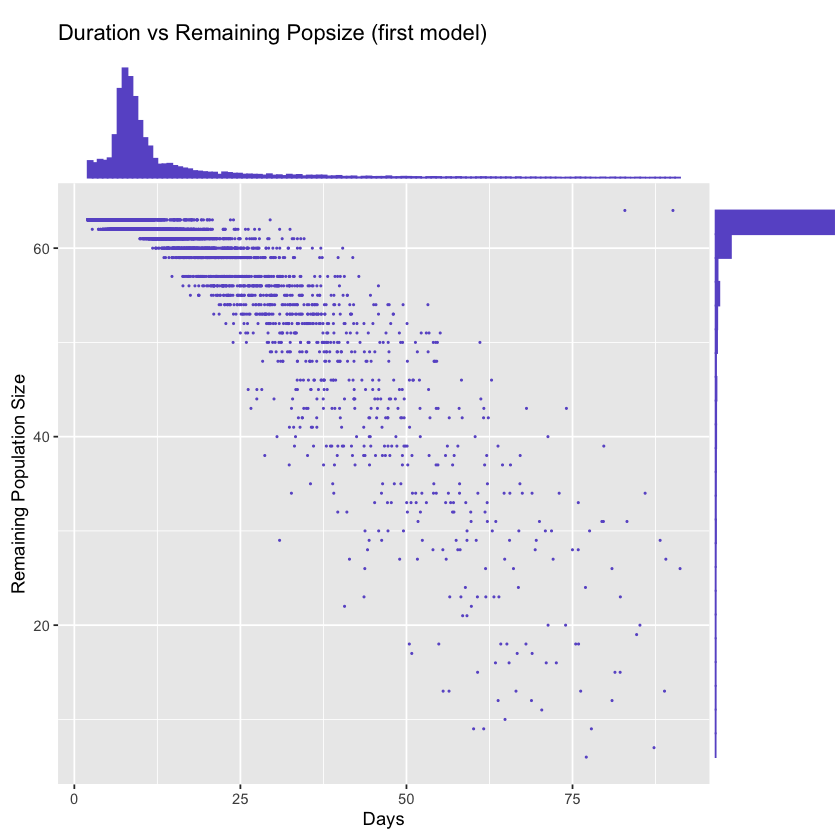

In [27]:
plot_time_vs_size('FPSO_base.log', 'first model')

Simulations from the second version of the models, assuming no asumptomatic transmissions, is similar but more severe than the first version because it has a higher percentage of pre-sympatomatic transmission rate (55% vs 45%), so the intensity of outbreaks are higher, resulting more "wipe-out" scenarios.

The simulations that allow asymptomatic transmissions have the clear spike at the first day. These are around 25% of the simulations with asymptomatic carrier that will not show any symptom and will not affect anyone. The overall severity of the outbreaks are weaker than the ones without asymptomatic carriers.

The distribution of outbreak looks quite different for simulations with lead incubation period, because the carrier will show symptom much sooner than cases without lead incubation time.